In [12]:
# if play the code in CoLab
import pandas as pd
import seaborn as sns
from google.colab import files
import io
import warnings
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import re

warnings.filterwarnings(action='ignore')

In [2]:
# if play the code in CoLab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# if play the code in CoLab
%cd drive/My Drive/Colab Notebooks/인지프/프로젝트/ProTACT/tensorflow/training_data

/content/drive/My Drive/Colab Notebooks/인지프/프로젝트/ProTACT/tensorflow/training_data


In [16]:
def load_pickle_file(filepath):
    with open(filepath, 'rb') as f:
        data = pickle.load(f)
    return data

# 피클 파일 불러오기
file_13 = 'training_data_epoch_13.pkl'
file_26 = 'training_data_epoch_26.pkl'
file_50 = 'training_data_epoch_50.pkl'

data_13 = load_pickle_file(file_13)
data_26 = load_pickle_file(file_26)
data_50 = load_pickle_file(file_50)

In [17]:
print(data_13)

{'train_loss': [0.017732741311192513, 0.014776601456105709, 0.01421686727553606, 0.013913282193243504, 0.01372537948191166, 0.013579321093857288, 0.013455085456371307, 0.013362962752580643, 0.013292805291712284, 0.013219797052443027, 0.013166611082851887, 0.013103044591844082, 0.01307852752506733], 'val_loss': [0.015233941376209259, 0.014138598926365376, 0.013754827901721, 0.01341936830431223, 0.013505345210433006, 0.013167822733521461, 0.013263244181871414, 0.013125586323440075, 0.012983104214072227, 0.013078846037387848, 0.013004799373447895, 0.012856515124440193, 0.012861546128988266], 'train_acc': [None, None, None, None, None, None, None, None, None, None, None, None, None], 'val_acc': [None, None, None, None, None, None, None, None, None, None, None, None, None], 'epoch_times': [1510.176421403885, 1396.082880973816, 1405.8942835330963, 1388.2484855651855, 1390.4138238430023, 1376.7769312858582, 1393.2503407001495, 1393.6474764347076, 1375.3632445335388, 1366.8255808353424, 1362.0

In [18]:
train_loss_1_50 = data_13['train_loss'] + data_26['train_loss'] + data_50['train_loss']
val_loss_1_50 = data_13['val_loss'] + data_26['val_loss'] + data_50['val_loss']

qwk_dev_1_50 = data_13['qwk_dev'] + data_26['qwk_dev'] + data_50['qwk_dev']
qwk_test_1_50 = data_13['qwk_test'] + data_26['qwk_test'] + data_50['qwk_test']

kappa_dev_history_1_50 = data_13['kappa_dev_history'] + data_26['kappa_dev_history'] + data_50['kappa_dev_history']
kappa_test_history_1_50 = data_13['kappa_test_history'] + data_26['kappa_test_history'] + data_50['kappa_test_history']


In [19]:
print(len(train_loss_1_50))

50


In [23]:
# 데이터 수집
epoch_times_1_13 = data_13['epoch_times']
epoch_times_14_26 = data_26['epoch_times']
epoch_times_27_50 = data_50['epoch_times']

# 평균 에포크 시간 계산
average_epoch_time_1_13 = np.mean(epoch_times_1_13)
average_epoch_time_14_26 = np.mean(epoch_times_14_26)
average_epoch_time_27_50 = np.mean(epoch_times_27_50)

print("GRU")
print(f'Average epoch time (1-13)-CPU: {average_epoch_time_1_13:.3f} seconds')
print(f'Average epoch time (14-26)-CPU: {average_epoch_time_14_26:.3f} seconds')
print(f'Average epoch time (27-50)-T4: {average_epoch_time_27_50:.3f} seconds')

GRU
Average epoch time (1-13)-CPU: 1389.555 seconds
Average epoch time (14-26)-CPU: 1572.436 seconds
Average epoch time (27-50)-T4: 143.657 seconds


In [24]:
# 그래프를 저장할 디렉토리 생성
images_dir = 'images'
if not os.path.exists(images_dir):
    os.makedirs(images_dir)

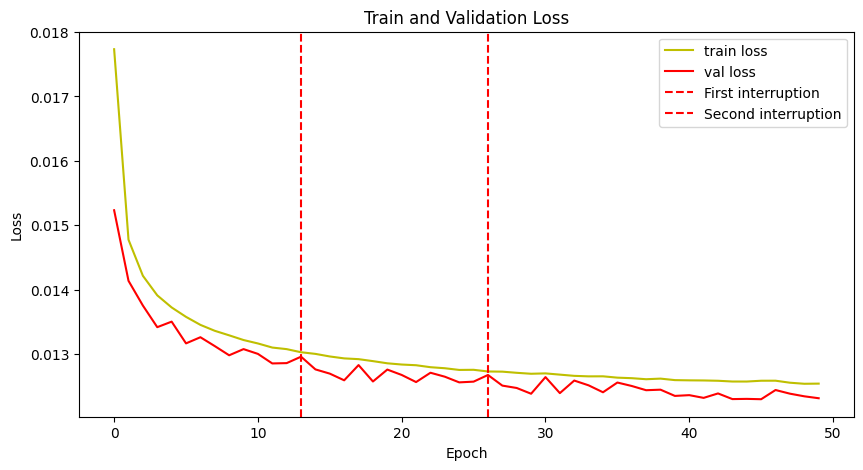

In [42]:
# train_loss와 val_loss 그래프 곡선
plt.figure(figsize=(10, 5))
plt.plot(train_loss_1_50, 'y', label='train loss')
plt.plot(val_loss_1_50, 'r', label='val loss')
plt.axvline(x=13, color='r', linestyle='--', label='First interruption')
plt.axvline(x=26, color='r', linestyle='--', label='Second interruption')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.savefig(os.path.join(images_dir, 'train_val_loss_curve.png'))
plt.show()

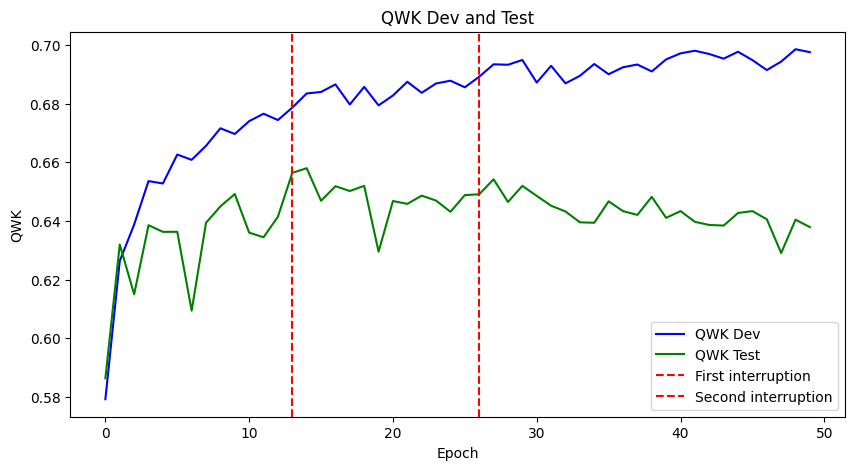

In [43]:
# qwk_dev와 qwk_test 그래프 곡선
plt.figure(figsize=(10, 5))
plt.plot(qwk_dev_1_50, 'b', label='QWK Dev')
plt.plot(qwk_test_1_50, 'g', label='QWK Test')
plt.axvline(x=13, color='r', linestyle='--', label='First interruption')
plt.axvline(x=26, color='r', linestyle='--', label='Second interruption')
plt.xlabel('Epoch')
plt.ylabel('QWK')
plt.title('QWK Dev and Test')
plt.legend()
plt.savefig(os.path.join(images_dir, 'qwk_dev_test_curve.png'))
plt.show()

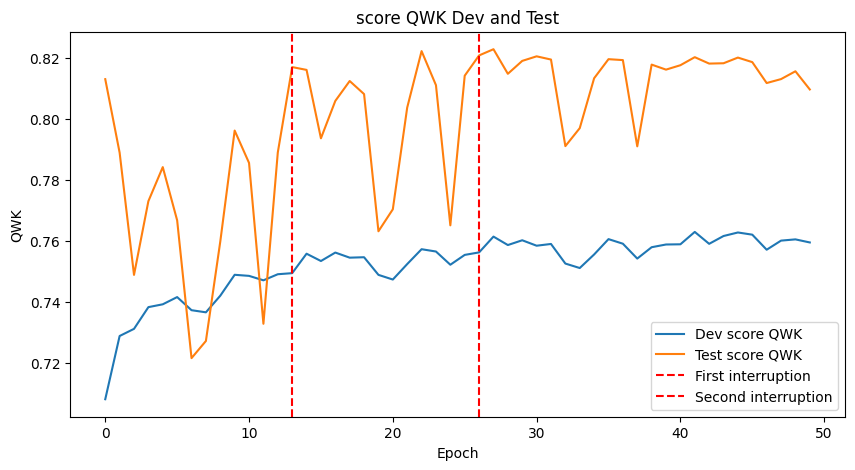

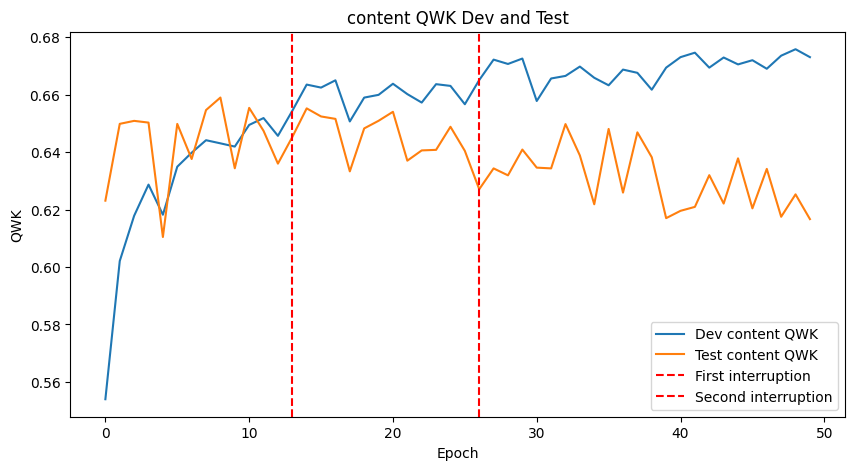

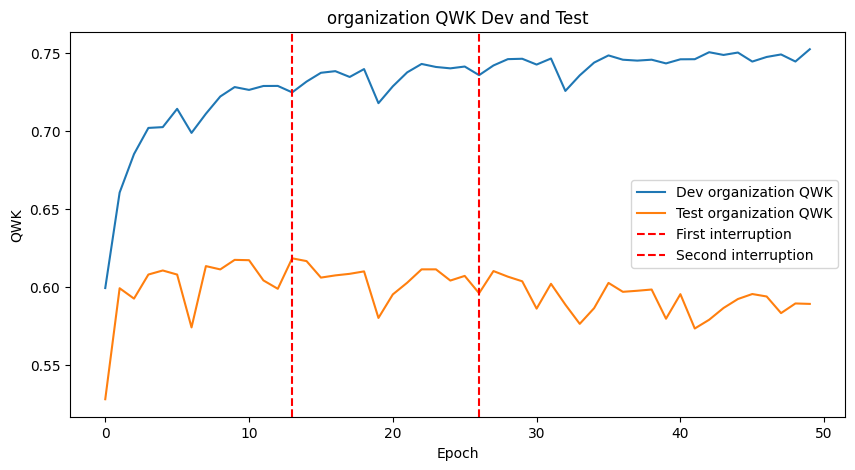

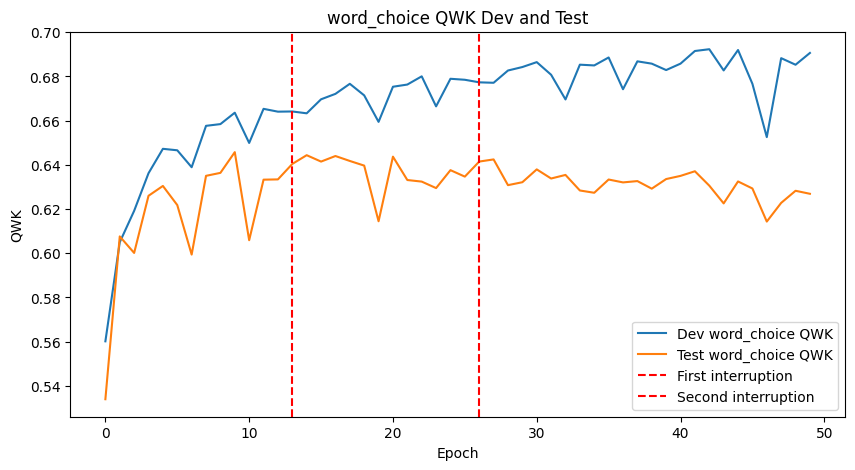

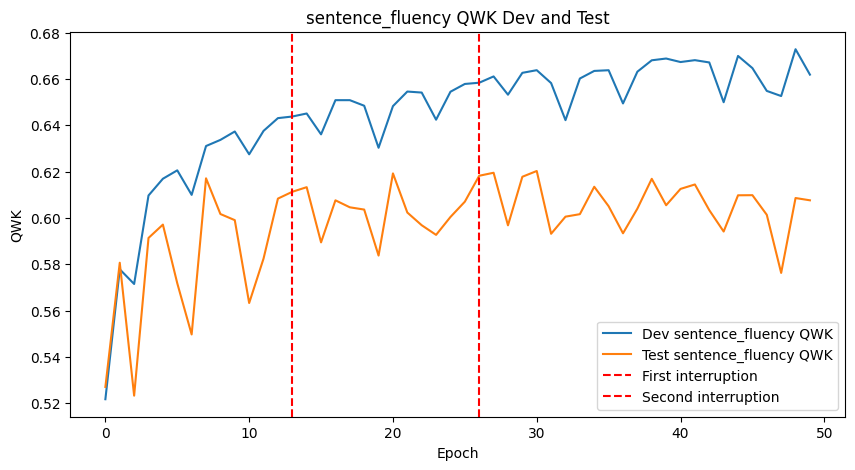

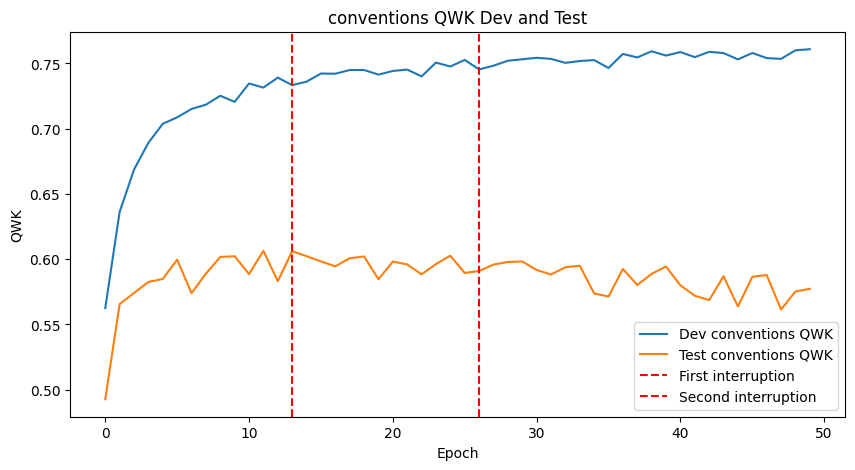

In [44]:
# kappa_dev_history와 kappa_test_history의 각 세부 값들의 변화 곡선
# 각 속성에 대해 kappa_dev_history와 kappa_test_history의 그래프를 생성
for key in kappa_test_history_1_50[0].keys():
    dev_values = [kappa[key] for kappa in kappa_dev_history_1_50]
    test_values = [kappa[key] for kappa in kappa_test_history_1_50]

    plt.figure(figsize=(10, 5))
    plt.plot(dev_values, label=f'Dev {key} QWK')
    plt.plot(test_values, label=f'Test {key} QWK')
    plt.axvline(x=13, color='r', linestyle='--', label='First interruption')
    plt.axvline(x=26, color='r', linestyle='--', label='Second interruption')
    plt.xlabel('Epoch')
    plt.ylabel('QWK')
    plt.title(f'{key} QWK Dev and Test')
    plt.legend()
    plt.savefig(os.path.join(images_dir, f'{key}_qwk_dev_test_curve.png'))
    plt.show()

In [29]:
combined_data = {
    'epoch_times': epoch_times_1_13 + epoch_times_14_26 + epoch_times_27_50,
    'train_loss': train_loss_1_50,
    'val_loss': val_loss_1_50,
    'qwk_dev': qwk_dev_1_50,
    'qwk_test': qwk_test_1_50,
    'kappa_dev_history': kappa_dev_history_1_50,
    'kappa_test_history': kappa_test_history_1_50
}


In [33]:
print(len(combined_data['kappa_dev_history']))

50


In [34]:
with open('training_data_epoch_1_50.pkl', 'wb') as f:
    pickle.dump(combined_data, f)

print("Combined data saved as 'combined_training_data_epoch_1_50.pkl'")

Combined data saved as 'combined_training_data_epoch_1_50.pkl'


In [35]:
# 불러올 파일 경로
combined_file = 'training_data_epoch_1_50.pkl'

# 파일 불러오기
combined_data = load_pickle_file(combined_file)

# 데이터 확인
epoch_times = combined_data['epoch_times']
train_loss = combined_data['train_loss']
val_loss = combined_data['val_loss']
qwk_dev = combined_data['qwk_dev']
qwk_test = combined_data['qwk_test']
kappa_dev_history = combined_data['kappa_dev_history']
kappa_test_history = combined_data['kappa_test_history']


In [36]:
# 데이터 길이 확인
print(f'Epoch times: {len(epoch_times)}')
print(f'Train loss: {len(train_loss)}')
print(f'Val loss: {len(val_loss)}')
print(f'QWK Dev: {len(qwk_dev)}')
print(f'QWK Test: {len(qwk_test)}')
print(f'Kappa Dev History: {len(kappa_dev_history)}')
print(f'Kappa Test History: {len(kappa_test_history)}')


Epoch times: 50
Train loss: 50
Val loss: 50
QWK Dev: 50
QWK Test: 50
Kappa Dev History: 50
Kappa Test History: 50


In [40]:
# 데이터 일부 확인
print(f'Epoch times: {epoch_times[26:28]}')
print(f'Train loss: {train_loss[26:28]}')
print(f'Val loss: {val_loss[26:28]}')
print(f'QWK Dev: {qwk_dev[26:28]}')
print(f'QWK Test: {qwk_test[26:28]}')
print(f'Kappa Dev History: {kappa_dev_history[26:28]}')
print(f'Kappa Test History: {kappa_test_history[26:28]}')

Epoch times: [260.35242533683777, 135.84250354766846]
Train loss: [0.012731757946312428, 0.012729078531265259]
Val loss: [0.012677364982664585, 0.012512481771409512]
QWK Dev: [0.6892101622911531, 0.6934367851531174]
QWK Test: [0.6490933999576395, 0.6542095896279752]
Kappa Dev History: [{'score': 0.7562097968096401, 'content': 0.6651204290061938, 'organization': 0.7358060227269168, 'word_choice': 0.6773198739358792, 'sentence_fluency': 0.6583782678119259, 'conventions': 0.745429084100593, 'prompt_adherence': 0.6475163942118265, 'language': 0.652633694316084, 'narrativity': 0.664477897701318}, {'score': 0.7613925169097157, 'content': 0.672238787936636, 'organization': 0.7420242552576235, 'word_choice': 0.6771179150627319, 'sentence_fluency': 0.6610962135227281, 'conventions': 0.7483113851982788, 'prompt_adherence': 0.6516078029287045, 'language': 0.6565413040136534, 'narrativity': 0.670600885547985}]
Kappa Test History: [{'score': 0.8208541837179858, 'content': 0.6270865747433703, 'organ

In [41]:
epoch_times_1_13 = epoch_times[:12]
epoch_times_14_26 = epoch_times[12:26]
epoch_times_27_50 = epoch_times[26:]

print(np.mean(epoch_times_1_13))
print(np.mean(epoch_times_14_26))
print(np.mean(epoch_times_27_50))

1393.087406039238
1556.3449219294957
143.65682897965112
